In [2]:
# !python3
# -*- coding:utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
num_user, num_item = 943, 1682
K = 2
np.random.seed(1)

def select_observed(R):
    oumu = []
    for u in range(num_user):
        for i in range(num_item):
            if R[u, i] > 0:
                oumu.append((u, i))
    return oumu


def loss_fuc(R, pred_R, P, Q, betap, betaq, oumu):
    '''
    :param R: rating matrix
    :param P: user feature matrices
    :param Q: movie feature matrices
    :param betap: 
    :param betaq: 
    :return: loss value
    '''
    loss = 0
    num = 0
    for u, i in oumu:
        num += 1
        loss += (R[u, i] - pred_R[u, i]) ** 2
        + betap * np.linalg.norm(P[u, :]) ** 2 + betaq * np.linalg.norm(
            Q[:, i]) ** 2
    loss /= num
    return loss



def SGD_update(R, P, Q, R_test, n_estimators, betap, betaq, alpha):
    '''
    :param R: rating train matrix
    :param P: user train feature matrices
    :param Q: movie train feature matrices
    :param R_test: rating test matrix
    :param P_test: user test feature matrices
    :param Q_test: movie test feature matrices
    :param n_estimators: iteration number
    :param betap: regularization parameter of P
    :param betaq: regularization parameter of Q
    :param alpha: learning rate
    :return: Optimized P and Optimized Q and the validation loss
    '''
    oumu = select_observed(R)
    oumu_test = select_observed(R_test)
    loss = []
    for t in range(n_estimators):
        pred_R = np.dot(P, Q)
        loss_val = loss_fuc(R_test,pred_R, P, Q, betap, betaq, oumu_test)
        print("[The %d iteration in test]: %f" % (t, loss_val))
        loss.append(loss_val)
        '''
        :batch :batch is the batch of SGD
        
        compute the gradient and update the P and Q as below
        
        '''
        batch = 100
        randindex = np.random.randint(0, len(oumu), size=batch)
        for u, i in [oumu[i] for i in randindex]:
            error = (R[u, i] - pred_R[u, i])
            grad_p = error * (-Q[:, i].T) + betap * P[u, :]
            grad_q = error * (-P[u, :].T) + betaq * Q[:, i]
            P[u, :] = P[u, :] - alpha * grad_p
            Q[:, i] = Q[:, i] - alpha * grad_q
    return P, Q, loss


def loaddata(filename):
    # load data
    df = pd.read_csv(filename, '\t')
    df.columns = ['user_id', 'item_id', 'rating', 'ts']
    # print(num_user, num_item)
    prefs = np.zeros(shape=(num_user, num_item))
    for line in df.itertuples():
        # print(line[1],line[2],line[3])
        prefs[line[1] - 1, line[2] - 1] = line[3]
    return prefs



In [3]:

R_train = loaddata('../data/ml-100k/u1.base')
R_test = loaddata('../data/ml-100k/u1.test')
# print(len(R_train))
# print(len(R_test))
# print(R_train)
# print(R_test)

'''
Matrix Factorization 
Initialize the user factor matrix P (shape=(n_users,k))  
and the item (movie) factor matrix Q (shape=(k,n_items)) 
n_components(ppt say it k) where is the number of potential features.
'''

# model = NMF(n_components=K)
# P = model.fit_transform(R_train)
# Q = model.components_
P = np.random.rand(num_user,K)
Q = np.random.rand(K,num_item)
P, Q, loss = SGD_update(R_train, P, Q, R_test, n_estimators=150, betap=0.1, betaq=0.1, alpha=0.1)

[The 0 iteration in test]: 10.592060
[The 1 iteration in test]: 10.238126
[The 2 iteration in test]: 9.893215
[The 3 iteration in test]: 9.629153
[The 4 iteration in test]: 9.372391
[The 5 iteration in test]: 9.025282
[The 6 iteration in test]: 8.758670
[The 7 iteration in test]: 8.379298
[The 8 iteration in test]: 8.116618
[The 9 iteration in test]: 7.747701
[The 10 iteration in test]: 7.464339
[The 11 iteration in test]: 7.154446
[The 12 iteration in test]: 6.930120
[The 13 iteration in test]: 6.645730
[The 14 iteration in test]: 6.396283
[The 15 iteration in test]: 6.084046
[The 16 iteration in test]: 5.879982
[The 17 iteration in test]: 5.723905
[The 18 iteration in test]: 5.525715
[The 19 iteration in test]: 5.300993
[The 20 iteration in test]: 5.121599
[The 21 iteration in test]: 4.902874
[The 22 iteration in test]: 4.775428
[The 23 iteration in test]: 4.632452
[The 24 iteration in test]: 4.520840
[The 25 iteration in test]: 4.363563
[The 26 iteration in test]: 4.246773
[The 27 i

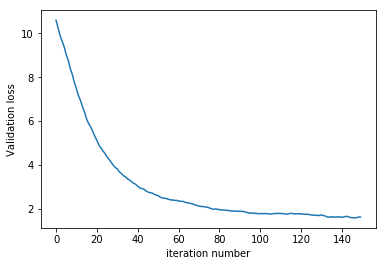

In [4]:
plt.plot(loss)
plt.xlabel('iteration number')
plt.ylabel('Validation loss')
plt.show()

2.84875007824


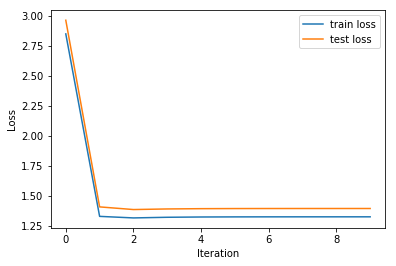

In [5]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
"""
-------------------------------------------------
   File Name：     RecomenderSystem
   Description :
   Author :       Nathan
   date：          2017/12/12
-------------------------------------------------
   Change Activity:
                   2017/12/12:
-------------------------------------------------
"""
__author__ = 'Nathan'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_users,n_items=943,1682
columns,rows=[],[]
observed_train,observed_test=[],[]
K=10
param={"lamda":0.7}
def getdata(filedir):
    header = ['user_id', 'item_id', 'rating', 'timestamp']
    data=pd.read_csv(filedir,sep='\t',names=header)
    global n_users
    global n_items
    data_matrix = np.zeros((n_users, n_items))
    for line in data.itertuples():
        data_matrix[line[1]-1, line[2]-1] = line[3]
    return data_matrix


def compute_loss(R,P,Q,observed):
    error=0
    num=0

    for u,i in observed:
        num += 1
        error += (R[u, i] - np.dot(P[u, :].reshape((1, K)), Q[:, i].reshape((K, 1))))[0][0] ** 2

    # for u in range(n_users):
    #     for i in range(n_items):
    #         if R[u,i]>0:
    #             num+=1
    #             error+=(R[u,i]-np.dot(P[u,:].reshape((1,K)),Q[:,i].reshape((K,1))))[0][0]**2
    return error/num


def optimizer(R,P,Q):
    for u in range(n_users):
        if rows[u]>0:
            temp_1=np.zeros((K,K))
            for i in range(n_items):
                 if R[u,i]>0:
                     temp_1 +=np.dot(Q[:,i].reshape((K,1)),Q[:,i].reshape((1,K)))
            temp_3=param.get("lamda")*rows[u]*np.eye(K)
            P[u,:]=np.dot(np.dot(np.linalg.inv(temp_1+temp_3),Q),R[u,:].reshape((n_items,1))).reshape((K,))




    for i in range(n_items):
        if columns[i]>0:
            temp_1 = np.zeros((K, K))
            for u in range(n_users):
                 if R[u,i]>0:
                     temp_1+=np.dot(P[u,:].reshape((K,1)),P[u,:].reshape((1,K)))
            temp_3=param.get("lamda")*columns[i]*np.eye(K)
            Q[:,i]=np.dot(np.dot(np.linalg.inv(temp_1+temp_3),P.T),R[:,i].reshape((n_users, 1))).reshape((K,))

    return P,Q


def observer(R,observed):
    for u in range(n_users):
        for i in range(n_items):
            if R[u,i]>0:
                observed.append((u,i))
    return observed


def RecomenderSystem():
    R=getdata('../data/ml-100k/u1.base')
    R_test=getdata('../data/ml-100k/u1.test')
    global columns
    global rows
    global observed_train, observed_test
    columns = (R != 0).sum(0)
    rows = (R != 0).sum(1)
    P = np.random.rand(n_users,K)
    Q = np.random.rand(K,n_items)
    observed_train=observer(R,observed_train)
    observed_test=observer(R_test,observed_test)
    train_loss=[]
    test_loss=[]
    iter_num=10

    print(compute_loss(R, P, Q,observed_train))
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    for i in range(iter_num):
        train_loss.append(compute_loss(R, P, Q,observed_train))
        test_loss.append(compute_loss(R_test, P, Q,observed_test))
        P, Q = optimizer(R, P, Q)

    plt.plot(range(iter_num),train_loss,label="train loss")
    plt.plot(range(iter_num),test_loss,label="test loss")
    plt.legend()
    plt.show()




RecomenderSystem()
